# Student's t-Tests Part 1
--------


Scientists have looked at finches to make hypotheses about evolution.

By mapping a trait over time like beak width, we can tell if an environment is selecting for a particular size of beak width. Maybe there’s a particular beak size that better helps the finch survive. Sometimes, there are random fluctuations in beak width due to variation in the population (some finches just have bigger beak widths than others). 

To determine whether there’s a significant change in width within the population over time, we need to use statistics.  

If the mean beak width does significantly increase or decrease in size, this is referred to as directional selection.  Then the environment allows the survival and reproduction of finches with bigger beak widths.

Population average beak width ($H_{0}$) is 6.07 mm.

#### Load the modules and configure some settings

In [1]:
%matplotlib inline

In [2]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
import math

sns.set(rc={"figure.figsize": (8.5, 5.5)})
sns.set_style('white')
current_palette = matplotlib.colors.hex2color('#90A4AE')

### Load the data

In [3]:
filepath = '.\\datasets\\finches_lesson_10.csv'
beak_widths = pd.read_csv(filepath, names=['Beak_Width'], header=0)
beak_widths[:6]

,Beak_Width
0,6.5
1,6.2
2,6.6
3,6.0
4,6.6
5,6.1


### Descriptive statistics

In [4]:
beak_widths.describe()

,Beak_Width
count,500.000000
mean,6.469600
std,0.396118
min,5.300000
25%,6.200000
50%,6.500000
75%,6.700000
max,7.600000


In [5]:
beak_widths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
Beak_Width    500 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


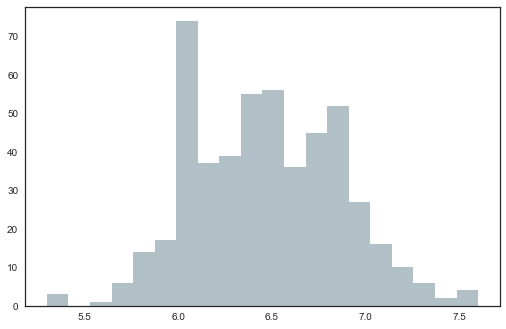

In [6]:
sns.distplot(beak_widths, bins=20,\
             hist_kws={"alpha": 0.7, "color": current_palette},\
             kde=False);

In [7]:
bk_mean = round(np.mean(beak_widths["Beak_Width"]), 2)
bk_std  = round(np.std(beak_widths["Beak_Width"], ddof=1), 2)
print "Sample mean: {0}".format(bk_mean)
print "Sample stdev: {0}".format(bk_std)


Sample mean: 6.47
Sample stdev: 0.4


Since we are dealing a sample standard deviation, we use the `ddof=1` argument to calculate the sample standard deviation.

### Problem

Do finches today have a beak widths that are different from before?

## Confidence interval for a sample (t-distribution)

Find the 95% confidence interval for a sample of 500 finch beak widths.

Confidence interval for unknown population standard deviation:

$$CI \ = \ \bar{x} \ \pm \ t^*SE \ \ = \ \ \bar{x} \ \pm \ t^* \frac{s}{\sqrt{n}}$$

#### Degrees of freedom

In [8]:
# Sample size
n = len(beak_widths)

# Degrees of freedom
dof = n - 1 

print "Sample size: {0}".format(n)
print "Degrees of freedom: {0}".format(dof)

Sample size: 500
Degrees of freedom: 499


#### Confidence level and t-critical value for the confidence interval

In [9]:
import scipy.stats as stats

# 95% confidence level
conf_level = 0.95  

# Probability region beyond middle 95%
p_alpha_ci = (1 - conf_level)/2  

t_crit_ci = abs(round(stats.t.ppf(p_alpha_ci, dof), 2))
print "t* critical value for CI: {0}".format((t_crit_ci))


t* critical value for CI: 1.96


#### Standard error

In [10]:
bk_SE = bk_std/math.sqrt(n)
print "Standard error: {0}".format(bk_SE)

Standard error: 0.01788854382


#### Margin of error

In [11]:
bk_ME = t_crit_ci * bk_SE
print "Margin of error: {0}".format(bk_ME)

Margin of error: 0.0350615458872


#### Confidence interval lower bound

In [12]:
bk_ci_lower = bk_mean - bk_ME
print "CI lower bound: {0}  (mean = {1})".format(bk_ci_lower, bk_mean)

CI lower bound: 6.43493845411  (mean = 6.47)


#### Confidence interval upper bound

In [13]:
bk_ci_upper = bk_mean + bk_ME
print "CI upper bound: {0}  (mean = {1})".format(bk_ci_upper, bk_mean)

CI upper bound: 6.50506154589  (mean = 6.47)


We are 95% confident that the population mean that can be inferred from our sample point estimate (6.47 mm) lies between 6.43 mm to 6.51 mm.

### Findings

Remember that the population average finch beak width ($H_{0}$) was 6.07 mm. 

Our new sample with a sample mean of 6.47 and a sample standard deviation of 0.40 has a 95% confidencec interval of from 6.43 to 6.51. 

The population mean is much less than the lower bound of the sample's confidence interval (a difference of 0.36).

This gives evidence that the distribution of our sample may have come from a significantly different distribution than the current population of finch beak widths at the 95% confidence level.

Let's analyze this further by conducting a formal hypothesis test of our sample.

### Hypotheses

Our null hypothesis is that the population mean for finches today is equal to what they have been.

H0: 𝛍 = 6.07

Since we just want to know if finches have different sized beak widths but we’re not concerned if the beaks are greater or less than what they were before, then our alternative hypothesis is:

HA: 𝛍 ≠ 6.07

### The t-statistic of the mean

In [14]:
def t_stat(xbar, mu, s, n):
    mean_diff = xbar - mu
    std_err = s/math.sqrt(n)
    result = mean_diff/std_err
    return result    

In [15]:
# Population mean
p_mean = 6.07
n = len(beak_widths)

t_statistic = round(t_stat(bk_mean, p_mean, bk_std, n), 2)
print "t-statistic for mean {0} is {1}".format(bk_mean, t_statistic)

t-statistic for mean 6.47 is 22.36


### The t-critical value for a two-tailed test

I decide to conduct the two-tailed hypothesis t-test with an alpha level of 0.05 (𝛂 = 0.05).

Since it is two-tailed and the distribution is symmetric, I need to divide 0.05 by 2 to get the proportion for each of the t-critical regions ( 𝛂 / 2 = 0.025 )


In [16]:
alpha_p = 0.025

t_crit = round(abs(stats.t.ppf(alpha_p, dof)), 2)
print "t-critical value: {0}".format(t_crit)

t-critical value: 1.96


### Decision

The t-statistic for the beak width of 6.47 mm is 22.36. This is considerably larger than the two-tailed t-critical value of 1.96 at an alpha level of 0.05 with 499 degrees of freedom.

We reject $H_0$ because the test-statistic is huge and we know that this will fall beyond the t-critical value no matter what significance level (alpha) we choose (the smallest being 0.01).

We also had this observation in our confidence interval discussion above.

Rejecting $H_{0}$ means that the probability of getting a t-statistic (the probability of getting a sample mean $\bar{x} = 6.47$ ) from a population with mean $\mu = 6.07$ is very, very small. That's the **p-value**.


> p-value is the probability of getting a t-statistic if the null hypothesis is true. 

Since the probability is so small, then there must be something else going on. The null hypothesis is probably not true. 

Finches with a beak width of 6.47 (our sample mean) come from an entirely new population (not equal to $\mu = 6.07$ as the mean).

## P-value

We are given a sample of 8 integers with a population mean of 10.

In [17]:
sample1 = np.array([5, 19, 11, 23, 12, 7, 3, 21])
sample1

array([ 5, 19, 11, 23, 12,  7,  3, 21])

Is the mean of the sample significantly different from 10 at an alpha level of 0.05?

In [18]:
# sample size
s1_size = len(sample1)
s1_dof  = s1_size - 1

print "sample size: {0}".format(s1_size)
print "degrees of freedom: {0}".format(s1_dof)

sample size: 8
degrees of freedom: 7


First, let's calculate the t-statistic.

In [19]:
s1_mean = np.mean(sample1)
s1_std  = np.std(sample1, ddof=1)

print "sample mean: {0}".format(round(s1_mean, 2))
print "sample stdev: {0}".format(round(s1_std, 2))

sample mean: 12.63
sample stdev: 7.6


Here's the information about the current population:

In [20]:
pop_mean = 10

In [21]:
# Calculate the t-statistic
s1_t_stat = t_stat(s1_mean, pop_mean, s1_std, s1_size)
print "sample t-statistic: {0}".format(s1_t_stat)

sample t-statistic: 0.977461894334


## How to get the p-value for a t-distribution

Given a t-statistic and degrees of freedom, we can use the survival function (`sf`) of the `t` namespace (aka the complementary CDF) to compute the one-sided p-value. 

The first argument is the t-statistic and the second is the degrees of freedom.

The two-sided p-value can be obtained by doubling the result from the one-sided p-value.

In [22]:
from scipy.stats import t

# one-tailed p-value (t-distribution)
s1_pvalue_1S = t.sf(s1_t_stat, s1_dof)  
s1_pvalue_2S = 2 * s1_pvalue_1S
print "P-value of sample (two-tailed): {0}".format(s1_pvalue_2S)

P-value of sample (two-tailed): 0.360904074567


This means that the difference between the sample mean of 12.63 and the current population mean of 10.00 is not statistically significant at an alpha of 0.05 because the probability (p-value of 0.361) is greater than our alpha level (significance level) of 0.05.

Therefore, we fail to reject the null and we are sticking to the assumption that the population that our sample is taken from is not significantly different from 10.

`p-value > 0.05`

#### Another way of determining the p-value on both sides of the two-tailed t-distribution

Once again display the t-statistic.

In [23]:
s1_t_stat

0.977461894333816

stats.t.cdf(s1_t_stat, s1_dof)

The proportion below the t-statistic can be determined using the following code. This gives the probability of selecting a sample with a mean less than our sample mean.

In [24]:
stats.t.cdf(s1_t_stat, s1_dof)

0.8195479627166837

However, we are interested in the probability of selecting a sample with a sample mean that is exactly or greater (or lesser) than our sample mean on both sides of the t-distribution.

Once we have the proportion of one of the tails, we just multiply it by 2 to get the total proportion for both tails.

In [25]:
(1 - stats.t.cdf(s1_t_stat, s1_dof))*2

0.36090407456663254

----


# Case Study: Rent (two-tailed t-Test)

$H_{0} = 1830$

$H_{A} \ne 1830$

$\bar{x} = 1700; \ s= 200; \alpha \ = \ 0.05$

Find the t-critical value for a two-tailed test at 𝛂 = 0.05

In [26]:
n = 25
dof = n - 1
rent_pop_mean = 1830
rent_mean = 1700
rent_stdev = 200

alpha = 0.05
alpha_p = 0.05/2

t_crit = round(abs(stats.t.ppf(alpha_p, dof)), 3)
print "t-critical value: {0}".format(t_crit)

t-critical value: 2.064


In [27]:
# Standard error
rent_SE = rent_stdev/math.sqrt(n)
print "standard error: {0}".format(rent_SE)

standard error: 40.0


In [31]:
# Calculate the t-statistic
rent_t_stat = round(t_stat(rent_mean, rent_pop_mean, rent_stdev, n), 2)
print "t-statistic for mean {0} is {1}".format(rent_mean, rent_t_stat)

t-statistic for mean 1700 is -3.25


### Cohen's d

In [29]:
from __future__ import division

def cohens(xbar, mu, s):
    mean_diff = xbar - mu
    result = mean_diff/s
    return result   

In [30]:
rent_cohens = cohens(rent_mean, rent_pop_mean, rent_stdev)
print "cohen's d: {0}".format(rent_cohens)

cohen's d: -0.65


> Cohen's d is a common measure of effect size which can be used to tell the standardized difference between two means. The difference between Rental California and Santa Clara County's  average rent is moderate.

### Decision

Since our t-statistic (-3.25)  is in the critical region past the t-critical value (-2.064), in this case the left critical region, the sample data provides evidence of a difference between the mean apartment rental rates of Rental California as compared to the mean rental rates in Santa Clara County. Therefore, we we reject the null hypothesis that there is no difference in rental rates between Rental California and Santa Clara County as a whole. Further, Cohen's effect size value (d= -.65) suggested a moderate practical significance.

Rental California charges significantly less for rent than in Santa Clara County as a whole.


-----



# Case Study: Keyboards (Dependend t-test for paired samples)

Repeated measures design - where every participant gets both treatments. 

There are two cellphones with different keyboard configurations. A researcher is interested in the effects of the cellphone configurations on errors made in typing text messages. 

To study this, 25 participants used each keyboard type (QWERTY and alphabetical). They typed a standardized twenty-word text message within 30 seconds. The number of errors for each person using each type of keyboard was recorded.  

These participants were randomly assigned to which type of keyboard they used first. 


In [32]:
filepath = '.\\datasets\\keyboards_lesson_10.csv'
keyboards = pd.read_csv(filepath, names=['Errors_Q', 'Errors_A'], header=0)
keyboards[:6]

,Errors_Q,Errors_A
0,6,6
1,6,11
2,2,8
3,7,5
4,8,11
5,8,8


In [34]:
keyboards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Errors_Q    25 non-null int64
Errors_A    25 non-null int64
dtypes: int64(2)
memory usage: 472.0 bytes


In [33]:
keyboards.describe()

,Errors_Q,Errors_A
count,25.000000,25.000000
mean,5.080000,7.800000
std,2.059935,2.645751
min,2.000000,3.000000
25%,4.000000,6.000000
50%,5.000000,8.000000
75%,7.000000,10.000000
max,10.000000,13.000000


In [55]:
errQ = keyboards['Errors_Q']
errA = keyboards['Errors_A']

In [65]:
errQ_n = len(errQ)
errQ_dof = errQ_n - 1
errQ_mean = np.mean(errQ)
errQ_std  = np.std(errQ, ddof=1)

print "QWERTY errors mean: {0}".format(errQ_mean)
print "QWERTY std dev: {0}".format(errQ_std)


QWERTY errors mean: 5.08
QWERTY std dve: 2.05993527406


In [66]:
errA_n = len(errA)
errA_dof = errA_n - 1
errA_mean = np.mean(errA)
errA_std  = np.std(errA, ddof=1)

print "Alpha errors mean: {0}".format(errA_mean)
print "Alpha std dev: {0}".format(errA_std)

Alpha errors mean: 7.8
Alpha std dev: 2.64575131106


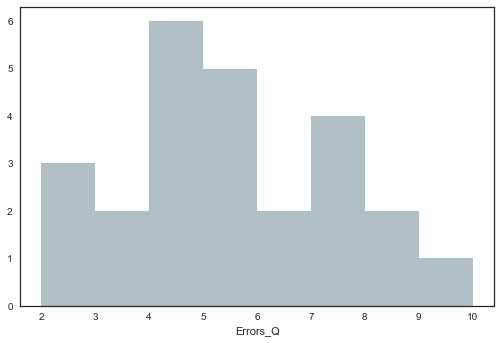

In [56]:
sns.distplot(errQ, bins=8,\
             hist_kws={"alpha": 0.7, "color": current_palette},\
             kde=False);

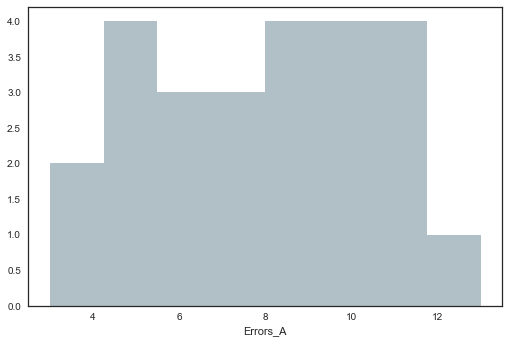

In [57]:
sns.distplot(errA, bins=8,\
             hist_kws={"alpha": 0.7, "color": current_palette},\
             kde=False);

We want to see if there’s a significant difference between the number of errors made on each keyboard.